In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

#### 系统自带数据集

In [2]:
housing = fetch_california_housing(as_frame = True)
df = housing.frame
print(df[['MedHouseVal', 'AveRooms']].head())

   MedHouseVal  AveRooms
0        4.526  6.984127
1        3.585  6.238137
2        3.521  8.288136
3        3.413  5.817352
4        3.422  6.281853


In [4]:
r = (df['AveRooms']).corr(df['MedHouseVal'])
print(f"皮尔森相关系数 r = {r:.3f}")

皮尔森相关系数 r = 0.152


In [9]:
corr_matrix = df.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


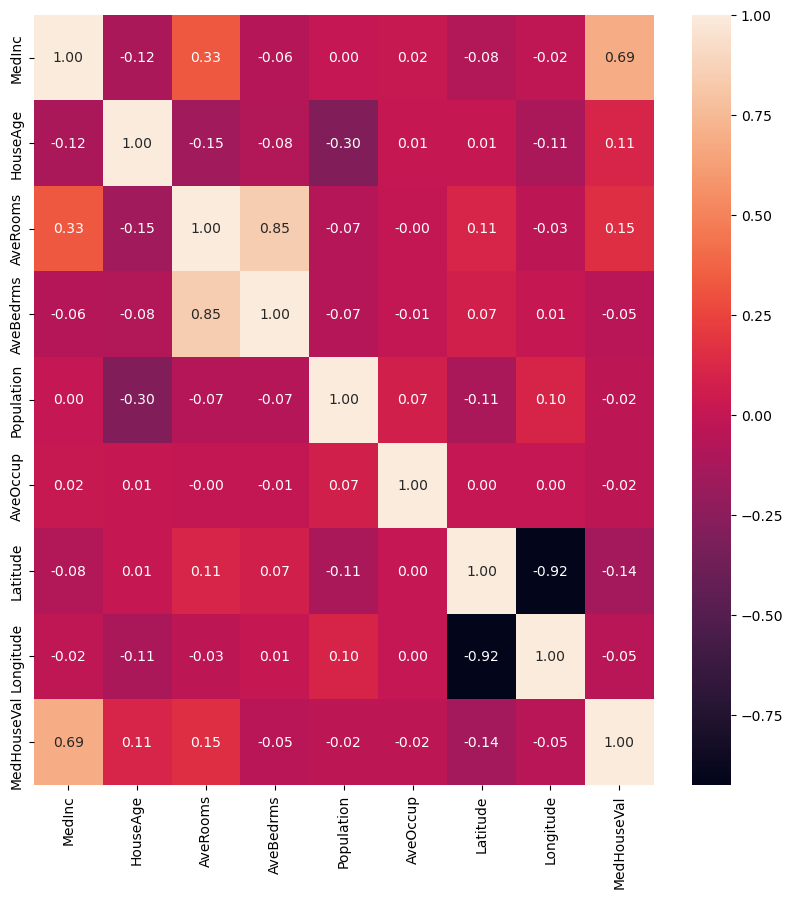

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

g = sns.heatmap(corr_matrix, annot=True, fmt='.2f',ax = ax)

for label in g.get_xticklabels():
    label.set_rotation(90)

#### 街景数据集

In [34]:
image_data = pd.read_csv('20251027_rating_data.csv')

In [35]:
image_data = image_data.drop(columns=['Unnamed: 0'])

In [36]:
image_data.head()

,cluster_centers_rgb,color_ratios_raw,cluster_centers_hsv,matched_colors_raw,matched_colors,color_ratios_matched,filename,h_mean,h_std,s_mean,v_mean,v_max,place_id,simple_score,elo_score_x,elo_score_y,elo_score
0,[[153 160 165]\n [ 22 80 129]\n [127 123 111]...,[0.34035833 0.03794167 0.32735833 0.1571 0...,"[array([103, 19, 165], dtype=uint8), array([1...","['gray', 'cyan', 'orange', 'gray', 'yellow']","['gray', 'cyan', 'orange', 'yellow']","[np.float64(0.49745833333333334), np.float64(0...",51415142fdc9f04926007f43.jpg,59.777342,42.281507,43.972375,146.078017,255,51415142fdc9f04926007f43,0.000000,968.956512,968.956512,968.956512
1,[[ 36 35 26]\n [171 174 177]\n [ 93 96 66]...,[0.27780833 0.1731 0.21171667 0.1403 0...,"[array([27, 71, 36], dtype=uint8), array([105,...","['yellow', 'gray', 'yellow', 'orange', 'yellow']","['yellow', 'gray', 'orange']","[np.float64(0.6866), np.float64(0.1731), np.fl...",50f5ed9afdc9f065f0008e32.jpg,44.728267,37.648842,62.034000,94.703683,255,50f5ed9afdc9f065f0008e32,0.500000,996.751165,996.751165,996.751165
2,[[153 148 121]\n [ 53 54 32]\n [214 215 209]...,[0.202775 0.20121667 0.1415 0.24424167 0...,"[array([ 25, 53, 153], dtype=uint8), array([ ...","['yellow', 'yellow', 'white', 'cyan', 'yellow']","['yellow', 'white', 'cyan']","[np.float64(0.6142583333333334), np.float64(0....",513e6050fdc9f0358700b395.jpg,52.645892,38.345215,70.778133,143.088600,255,513e6050fdc9f0358700b395,0.692308,1081.661041,1081.661041,1081.661041
3,[[ 68 72 69]\n [204 205 204]\n [157 159 158]...,[0.24099167 0.27510833 0.28238333 0.09298333 0...,"[array([68, 14, 72], dtype=uint8), array([ 60,...","['gray', 'white', 'gray', 'gray', 'yellow']","['gray', 'white', 'yellow']","[np.float64(0.6163583333333332), np.float64(0....",50f5eb28fdc9f065f0008096.jpg,59.708800,44.573643,29.268692,136.006450,255,50f5eb28fdc9f065f0008096,0.000000,984.000000,984.000000,984.000000
4,[[ 52 54 33]\n [143 140 133]\n [203 205 204]...,[0.23179167 0.2211 0.0928 0.12643333 0...,"[array([33, 99, 54], dtype=uint8), array([ 21,...","['yellow', 'gray', 'white', 'gray', 'gray']","['yellow', 'gray', 'white']","[np.float64(0.23179166666666667), np.float64(0...",50f5ec32fdc9f065f00087a7.jpg,46.192183,39.487293,49.982667,126.712392,255,50f5ec32fdc9f065f00087a7,0.250000,925.638091,925.638091,925.638091


In [37]:
r = image_data['h_mean'].corr(image_data['h_std'])
print(f"皮尔森相关系数 r = {r:.3f}")

皮尔森相关系数 r = 0.280


截距（Intercept）: 0.2929360635122771
斜率（Coefficient）: 0.0016599270323480154
R²: 0.006803589630551055
RMSE: 0.2390178762920891


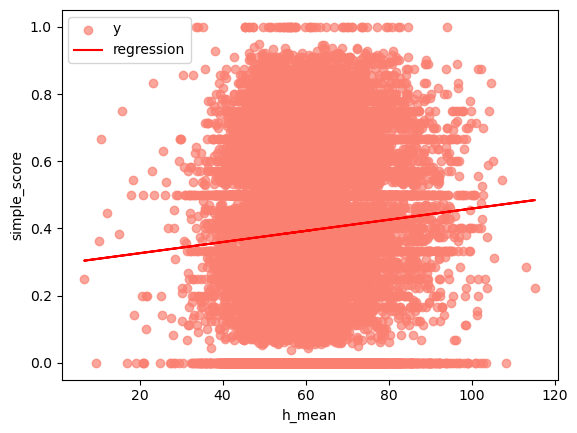

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = image_data[['h_mean']]
y = image_data['simple_score']

# 分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 输出模型信息
print("截距（Intercept）:", model.intercept_)
print("斜率（Coefficient）:", model.coef_[0])

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, label='y',color='salmon',alpha=0.7)
plt.plot(X_test, y_pred, color='red', label='regression')
plt.xlabel("h_mean")
plt.ylabel("simple_score")
plt.legend()
plt.show()